In [1]:
from datasets import load_dataset
import os

import uuid
from tqdm import tqdm
import json

/home/omote/cluster_project/iam2/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


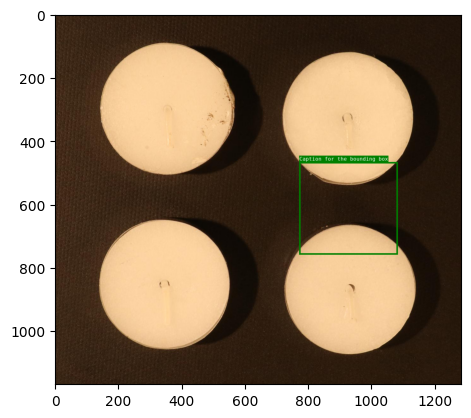

In [11]:
import imgviz
import numpy as np
import matplotlib.pyplot as plt
import regex as re
from PIL import Image

def visualize_bbox(image, bbox, caption):
    bboxes = np.array([bbox[1],bbox[0],bbox[3],bbox[2]]).astype(np.int32).reshape(-1, 4)
    labels = [2]
    image = imgviz.instances2rgb(np.array(image), bboxes=bboxes, labels=labels,captions=[caption],font_size=16)

    plt.imshow(image)
    plt.show()
    
def extract_bbox_from_text(ans):
    pattern = re.compile(r'\[(((0|1)\.(\d){3}\,){3}((0|1)\.(\d){3}))\]')
    match_list = pattern.findall(ans)

    if len(match_list) > 0:
        answer = [list(map(float,match[0].split(","))) for match in match_list]
    else:
        answer = "FAILED"
    return answer

def bbox_relative_to_absolute(relative_bbox, image_width_height):
    width, height = image_width_height
    x1 = relative_bbox[0] * width
    y1 = relative_bbox[1] * height
    x2 = relative_bbox[2] * width
    y2 = relative_bbox[3] * height
    absolute_bbox = [x1, y1, x2, y2]
    return absolute_bbox

image_root_dir = "/data_ssd/visa"

file_name = "visa/test/candle/Anomaly/072.JPG"
bbox = "[0.600,0.400,0.842,0.650]"

image = Image.open(os.path.join(image_root_dir, file_name))
original_image_width_height = (image.width, image.height)

relative_bbox = extract_bbox_from_text(bbox)[0]
absolute_bbox = bbox_relative_to_absolute(relative_bbox, original_image_width_height)

visualize_bbox(image, absolute_bbox, "Caption for the bounding box")
